<a href="https://colab.research.google.com/github/dongzooo/Quant-with-py/blob/main/%EC%BA%94%EB%93%A4%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D/%EC%A2%85%EB%AA%A9%EB%B3%84_%EC%88%98%EC%9D%B5%EC%8B%A4%ED%98%84_%EC%A7%84%EC%9E%85%EC%9E%90%EB%A6%AC_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# üî•Îß§ÏàòÏãúÏ†ê Î∂ÑÏÑù

### 1. Import Î∞è Îç∞Ïù¥ÌÑ∞ ÌååÏùº Î∂àÎü¨Ïò§Í∏∞

In [ ]:
import yfinance as yf
import pandas as pd
import datetime
from google.colab import files

import seaborn as sns
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import Logit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Colab Ïùò ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
# plt.rc('font', family='NanumBarunGothic')

# Ïú†ÎãàÏΩîÎìúÏóêÏÑú  ÏùåÏàò Î∂ÄÌò∏ÏÑ§Ï†ï
matplotlib.rc('axes', unicode_minus=False)

In [ ]:
files.upload()

### 2. ÏàòÏùµÏãúÏ†ê Îç∞Ïù¥ÌÑ∞ ÏóÖÎ°úÎìú

In [ ]:
#ÏàòÏùµ Î™©Î°ù ÏóÖÎ°úÎìú
profitRecord = pd.read_csv(f"/content/gainsTransactions.csv")
profitRecord = profitRecord.drop(profitRecord.columns[0], axis=1)
profitRecord.columns = ['Timestamp', 'Order', 'Code', 'Name', 'price']
profitRecord['Timestamp'] = pd.to_datetime(profitRecord['Timestamp'], format="%y-%m-%d %H:%M:%S")
profitRecord = profitRecord.drop_duplicates().sort_values('Timestamp').reset_index(drop=True)

In [ ]:
#Ï¢ÖÎ™©Î≥ÑÎ°ú ÌååÏùºÏùÑ Î∂àÎü¨ ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÎèåÎ¶¨Í∏∞ÏúÑÌï¥ Ï¢ÖÎ™©Î™ÖÎßå Îã¥ÏùÄ ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÏÉùÏÑ±ÌñàÎã§.
tempProfitRecord = profitRecord
stocks = tempProfitRecord["Name"].tolist()
stocks

In [ ]:
#Í∏∞Ï°¥ Î∂ÑÎ¥âÎç∞Ïù¥ÌÑ∞ÏôÄ ÏßÑÏûÖÏãúÏ†ê ÎπÑÍµêÌïòÍ∏∞ ÏúÑÌï¥ Ï¥àÎç∞Ïù¥ÌÑ∞ 0ÏúºÎ°ú Ï¥àÍ∏∞Ìôî
profitRecord["Timestamp"] = profitRecord["Timestamp"].dt.floor("Min")
profitRecord

Timestamp Order    Code     Name  price
0  2023-06-15 09:32:00  ÌòÑÍ∏àÎß§Ïàò  900250  ÌÅ¨Î¶¨Ïä§ÌÉàÏã†ÏÜåÏû¨   4275
1  2023-06-15 09:59:00  ÌòÑÍ∏àÎß§Ïàò   42700    ÌïúÎØ∏Î∞òÎèÑÏ≤¥  28439
2  2023-06-15 10:05:00  ÌòÑÍ∏àÎß§Ïàò  348080     ÌÅêÎùºÌã∞Ïä§   5790
3  2023-06-15 10:20:00  ÌòÑÍ∏àÎß§Ïàò  250000     Î≥¥ÎùºÌã∞Ïïå  21650
4  2023-06-15 10:20:00  ÌòÑÍ∏àÎß§Ïàò    6880    Ïã†ÏÜ°ÌôÄÎî©Ïä§  14700
5  2023-06-15 10:26:00  ÌòÑÍ∏àÎß§Ïàò    2140     Í≥†Î†§ÏÇ∞ÏóÖ   4655
6  2023-06-15 10:36:00  ÌòÑÍ∏àÎß§Ïàò    6880    Ïã†ÏÜ°ÌôÄÎî©Ïä§  15150
7  2023-06-15 10:41:00  ÌòÑÍ∏àÎß§Ïàò    7540       ÏÉòÌëú  72800
8  2023-06-15 10:47:00  ÌòÑÍ∏àÎß§Ïàò  323280       ÌÉúÏÑ±   2441
9  2023-06-15 11:05:00  ÌòÑÍ∏àÎß§Ïàò  372910  ÌïúÏª¥ÎùºÏù¥ÌîÑÏºÄÏñ¥   6530
10 2023-06-15 11:07:00  ÌòÑÍ∏àÎß§Ïàò   78140    ÎåÄÎ¥âÏóòÏóêÏä§  10240
11 2023-06-15 11:56:00  ÌòÑÍ∏àÎß§Ïàò  376180     ÌîºÏΩîÍ∑∏Îû®  10290
12 2023-06-15 13:20:00  ÌòÑÍ∏àÎß§Ïàò   12030       DB   2360
13 2023-06-15 14:07:00  ÌòÑÍ∏àÎß§Ïàò   10170    ÎåÄÌïúÍ¥ëÌÜµÏã†   2555
14 2023-06-15 14:13:00  ÌòÑÍ∏àÎß§Ïàò  420770     Í∏∞Í∞ÄÎπÑÏä§  69500
15 2023-06-15 14:46:00  ÌòÑÍ∏àÎß§Ïàò  250000     Î≥¥ÎùºÌã∞Ïïå  22028
16 2023-06-16 10:00:00  ÌòÑÍ∏àÎß§Ïàò  323280       ÌÉúÏÑ±   2685
17 2023-06-16 10:02:00  ÌòÑÍ∏àÎß§Ïàò    7660   Ïù¥ÏàòÌéòÌÉÄÏãúÏä§  21150
18 2023-06-16 10:50:00  ÌòÑÍ∏àÎß§Ïàò  412350     Î†àÏù¥Ï†ÄÏéå  10999
19 2023-06-16 11:01:00  ÌòÑÍ∏àÎß§Ïàò  376180     ÌîºÏΩîÍ∑∏Îû®  10700
20 2023-06-16 11:51:00  ÌòÑÍ∏àÎß§Ïàò  412350     Î†àÏù¥Ï†ÄÏéå  11243
21 2023-06-16 13:56:00  ÌòÑÍ∏àÎß§Ïàò    1340     Î∞±Í¥ëÏÇ∞ÏóÖ   9155
22 2023-06-19 09:44:00  ÌòÑÍ∏àÎß§Ïàò   10660     ÌôîÏ≤úÍ∏∞Í≥Ñ   4890
23 2023-06-19 09:48:00  ÌòÑÍ∏àÎß§Ïàò  412350     Î†àÏù¥Ï†ÄÏéå  12000
24 2023-06-19 11:47:00  ÌòÑÍ∏àÎß§Ïàò   10660     ÌôîÏ≤úÍ∏∞Í≥Ñ   5110

### 3. Î∂ÑÏÑù Î©îÏÑúÎìú

#### 3.1 Î≥ÄÍ≥° Î∞úÏÉùÌïú Ïù∏Îç±Ïä§ ÏÑúÏπòÌïòÎäî Î©îÏÑúÎìú

In [ ]:
# Î≥ÄÍ≥°Î∞úÏÉùÎßå Í≤ÄÏÉâ
def findInflection(n, df, col_name):
    turning_points = []
    start_num = n + 1
    for i in range(start_num, len(df)):
      # Î≥ÄÍ≥° Î∞úÏÉù
      if (df[col_name].iloc[i] > df[col_name].iloc[i - 1] <= df[col_name].iloc[i - 2]):
              turning_points.append(i)
    return turning_points

### 3.2 ÏàòÏùµÏãúÏ†êÏóê Í±∞ÎûòÏßÄÌëú ÏÉùÏÑ± Î∞è Ï†ïÍ∑úÌôî

In [ ]:
def getProfitPoint(i):
  df1Min = pd.read_csv(f"/content/ytd1MinData{stocks[i]}.csv")
  df1Min = df1Min.drop(df1Min.columns[0], axis=1)
  df1Min.columns = ['Timestamp', 'Open', 'High', 'Low', 'Close','Volume']
  df1Min['Timestamp'] = pd.to_datetime(df1Min['Timestamp'], format="%y-%m-%d %H:%M:%S")
  df1Min = df1Min.drop_duplicates().sort_values('Timestamp').reset_index(drop=True)
  df1Min["Name"] = profitRecord.loc[i]["Name"]

  df3Min = pd.read_csv(f"/content/ytd3MinData{stocks[i]}.csv")
  df3Min = df3Min.drop(df3Min.columns[0], axis=1)
  df3Min.columns = ['Timestamp', 'Open', 'High', 'Low', 'Close','Volume']
  df3Min['Timestamp'] = pd.to_datetime(df3Min['Timestamp'], format="%y-%m-%d %H:%M:%S")
  df3Min = df3Min.drop_duplicates().sort_values('Timestamp').reset_index(drop=True)

  df10Min = pd.read_csv(f"/content/ytd10MinData{stocks[i]}.csv")
  df10Min = df10Min.drop(df10Min.columns[0], axis=1)
  df10Min.columns = ['Timestamp', 'Open', 'High', 'Low', 'Close','Volume']
  df10Min['Timestamp'] = pd.to_datetime(df10Min['Timestamp'], format="%y-%m-%d %H:%M:%S")
  df10Min = df10Min.drop_duplicates().sort_values('Timestamp').reset_index(drop=True)

  df30Min = pd.read_csv(f"/content/ytd30MinData{stocks[i]}.csv")
  df30Min = df30Min.drop(df30Min.columns[0], axis=1)
  df30Min.columns = ['Timestamp', 'Open', 'High', 'Low', 'Close','Volume']
  df30Min['Timestamp'] = pd.to_datetime(df30Min['Timestamp'], format="%y-%m-%d %H:%M:%S")
  df30Min = df30Min.drop_duplicates().sort_values('Timestamp').reset_index(drop=True)

  '''1Î∂ÑÎ¥â '''
  #Í±∞Îûò Ïù¥ÌèâÏÑ†
  df1Min['2VMA'] = df1Min['Volume'].rolling(window=2).mean()
  df1Min['5VMA'] = df1Min['Volume'].rolling(window=5).mean()
  df1Min['10VMA'] = df1Min['Volume'].rolling(window=10).mean()
  df1Min['20VMA'] = df1Min['Volume'].rolling(window=20).mean()
  df1Min['1Min_5VMAÏö∞ÏÉÅÌñ•'] = df1Min['5VMA'].pct_change().apply(lambda x: 1 if x >= 0 else 0)
  df1Min['1Min_20VMAÏö∞ÏÉÅÌñ•'] = df1Min['20VMA'].pct_change().apply(lambda x: 1 if x >= 0 else 0)
    #df1Min Ï†ïÎ∞∞Ïó¥
  df1Min['1Min5_20VMAÏ†ïÎ∞∞Ïó¥'] = df1Min.apply(lambda row: 1 if row['5VMA'] > row['20VMA'] else 0, axis=1)
  df1Min['1Min2_5_10_20VMAÏ†ïÎ∞∞Ïó¥'] = df1Min.apply(lambda row: 1 if row['2VMA'] > row['5VMA'] > row['10VMA'] > row['20VMA'] else 0, axis=1)

  '''3Î∂ÑÎ¥â'''
  #Í±∞Îûò Ïù¥ÌèâÏÑ† ÏÉùÏÑ±
  df3Min['2VMA'] = df3Min['Volume'].rolling(window=2).mean()
  df3Min['5VMA'] = df3Min['Volume'].rolling(window=5).mean()
  df3Min['10VMA'] = df3Min['Volume'].rolling(window=10).mean()
  df3Min['20VMA'] = df3Min['Volume'].rolling(window=20).mean()
    #df3Min Ï†ïÎ∞∞Ïó¥
  df3Min['3Min5_20VMAÏ†ïÎ∞∞Ïó¥'] = df3Min.apply(lambda row: 1 if row['5VMA'] > row['20VMA'] else 0, axis=1)
  df3Min['3Min2_5_10_20VMAÏ†ïÎ∞∞Ïó¥'] = df3Min.apply(lambda row: 1 if row['2VMA'] > row['5VMA'] > row['10VMA'] > row['20VMA'] else 0, axis=1)

  '''10Î∂ÑÎ¥â'''
  #Í±∞Îûò Ïù¥ÌèâÏÑ† ÏÉùÏÑ±
  df10Min['2VMA'] = df10Min['Volume'].rolling(window=2).mean()
  df10Min['3VMA'] = df10Min['Volume'].rolling(window=3).mean()
  df10Min['10Min2_3VMAÏ†ïÎ∞∞Ïó¥'] = df10Min.apply(lambda row: 1 if row['2VMA'] > row['3VMA'] else 0, axis=1)
  df10Min['10Min_2VMAÏö∞ÏÉÅÌñ•'] = df10Min['2VMA'].pct_change().apply(lambda x: 1 if x >= 0 else 0)
  df10Min['10Min_3VMAÏö∞ÏÉÅÌñ•'] = df10Min['3VMA'].pct_change().apply(lambda x: 1 if x >= 0 else 0)

  #Í±∞ÎûòÏù¥Ìèâ Î≥ÄÍ≥°
  df10MinInf = pd.DataFrame(columns=df10Min.columns)
  turning_points = findInflection(2,df10Min,"2VMA")
  for i in turning_points:
    df10MinInf = df10MinInf._append(df10Min.iloc[i],ignore_index=True)

  df10Min['10M_2VMAÎ≥ÄÍ≥°'] = 0
  df10Min.loc[df10Min['Timestamp'].isin(df10MinInf['Timestamp']), '10M_2VMAÎ≥ÄÍ≥°'] = 1

  '''30Î∂ÑÎ¥â'''
  #Í±∞Îûò Ïù¥ÌèâÏÑ† ÏÉùÏÑ±
  df30Min['2VMA'] = df30Min['Volume'].rolling(window=2).mean()
  df30Min['3VMA'] = df30Min['Volume'].rolling(window=3).mean()
  df30Min['30Min2_3VMAÏ†ïÎ∞∞Ïó¥'] = df30Min.apply(lambda row: 1 if row['2VMA'] > row['3VMA'] else 0, axis=1)
  df30Min['30Min_2VMAÏö∞ÏÉÅÌñ•'] = df30Min['2VMA'].pct_change().apply(lambda x: 1 if x > 0 else 0)

  #Í±∞ÎûòÏù¥Ìèâ Î≥ÄÍ≥°
  df30MinInf = pd.DataFrame(columns=df30Min.columns)
  turning_points = findInflection(2,df30Min,"2VMA")
  for i in turning_points:
    df30MinInf = df30MinInf._append(df30Min.iloc[i],ignore_index=True)

  df30Min['30M_2VMAÎ≥ÄÍ≥°'] = 0
  df30Min.loc[df30Min['Timestamp'].isin(df30MinInf['Timestamp']), '30M_2VMAÎ≥ÄÍ≥°'] = 1

  #3,10,30Î∂ÑÎ¥âÍ≥º 1Î∂ÑÎ¥â ÏãúÍ≥ÑÏó¥ ÏãúÏûë ÎßûÏ∂îÍ∏∞ + Ïö∞ÏÉÅÌñ•ÏÉùÏÑ±
  df1Min['Timestamp'].iloc[0]
  df3Min = df3Min[df3Min['Timestamp'] >= df1Min['Timestamp'].iloc[0]]
  df3Min = df3Min.reset_index(drop=True)

  df10Min = df10Min[df10Min['Timestamp'] >= df1Min['Timestamp'].iloc[0]]
  df10Min['2VMAÏö∞ÏÉÅÌñ•'] = df10Min['2VMA'].pct_change().apply(lambda x: 1 if x >= 0 else 0)
  df10Min = df10Min.reset_index(drop=True)

  df30Min = df30Min[df30Min['Timestamp'] >= df1Min['Timestamp'].iloc[0]]
  df30Min['2VMAÏö∞ÏÉÅÌñ•'] = df30Min['2VMA'].pct_change().apply(lambda x: 1 if x > 0 else 0)
  df30Min = df30Min.reset_index(drop=True)


  #df1MinÏóê Ï†ïÎ∞∞Ïó¥ Ï†ïÏùò
  #df1MinÏóê 3Î∂ÑÎ¥â 10Î∂ÑÎ¥â 30Î∂ÑÎ¥â ÏãúÍ∞ÑÏÑ† Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞Ä
  df1Min['3Î∂ÑÎã®ÏúÑ'] = df1Min['Timestamp'].dt.floor('3min')
  df1Min['10Î∂ÑÎã®ÏúÑ'] = df1Min['Timestamp'].dt.floor('10min')
  df1Min['30Î∂ÑÎã®ÏúÑ'] = df1Min['Timestamp'].dt.floor('30min')

  #df1Min Ïóê ÎÑ£ÏùÑ Îç∞Ïù¥ÌÑ∞Îì§
  df1Min["3Min5_20VMAÏ†ïÎ∞∞Ïó¥"] = 0
  df1Min['10M_2VMAÏö∞ÏÉÅÌñ•'] = 0
  df1Min['30M_2VMAÏö∞ÏÉÅÌñ•'] = 0
  df1Min['10Min2_3VMAÏ†ïÎ∞∞Ïó¥'] = 0
  df1Min['10Min_2VMAÏö∞ÏÉÅÌñ•'] = 0
  df1Min['10Min_3VMAÏö∞ÏÉÅÌñ•'] = 0
  df1Min['30Min2_3VMAÏ†ïÎ∞∞Ïó¥'] = 0
  df1Min['30Min_2VMAÏö∞ÏÉÅÌñ•'] = 0
  df1Min['3Min2_5_10_20VMAÏ†ïÎ∞∞Ïó¥'] = 0

  for i in range(len(df3Min)):
      timestamp = df3Min.loc[i, 'Timestamp']
      mask = df1Min['3Î∂ÑÎã®ÏúÑ'] == timestamp
      df1Min.loc[mask, '3Min5_20VMAÏ†ïÎ∞∞Ïó¥'] = df3Min.loc[i, '3Min5_20VMAÏ†ïÎ∞∞Ïó¥']
      df1Min.loc[mask, '3Min2_5_10_20VMAÏ†ïÎ∞∞Ïó¥'] = df3Min.loc[i, '3Min2_5_10_20VMAÏ†ïÎ∞∞Ïó¥']


  for i in range(len(df10Min)):
      timestamp = df10Min.loc[i, 'Timestamp']
      mask = df1Min['10Î∂ÑÎã®ÏúÑ'] == timestamp
      df1Min.loc[mask, '10M_2VMAÏö∞ÏÉÅÌñ•'] = df10Min.loc[i, '2VMAÏö∞ÏÉÅÌñ•']
      df1Min.loc[mask, '10Min2_3VMAÏ†ïÎ∞∞Ïó¥'] = df10Min.loc[i, '10Min2_3VMAÏ†ïÎ∞∞Ïó¥']
      df1Min.loc[mask, '10M_2VMAÎ≥ÄÍ≥°'] = df10Min.loc[i, '10M_2VMAÎ≥ÄÍ≥°']
      df1Min.loc[mask, '10Min_2VMAÏö∞ÏÉÅÌñ•'] = df10Min.loc[i, '10Min_2VMAÏö∞ÏÉÅÌñ•']
      df1Min.loc[mask, '10Min_3VMAÏö∞ÏÉÅÌñ•'] = df10Min.loc[i, '10Min_3VMAÏö∞ÏÉÅÌñ•']


  for i in range(len(df30Min)):
      timestamp = df30Min.loc[i, 'Timestamp']
      mask = df1Min['30Î∂ÑÎã®ÏúÑ'] == timestamp
      df1Min.loc[mask, '30M_2VMAÏö∞ÏÉÅÌñ•'] = df30Min.loc[i, '2VMAÏö∞ÏÉÅÌñ•']
      df1Min.loc[mask, '30Min2_3VMAÏ†ïÎ∞∞Ïó¥'] = df30Min.loc[i, '30Min2_3VMAÏ†ïÎ∞∞Ïó¥']
      df1Min.loc[mask, '30M_2VMAÎ≥ÄÍ≥°'] = df30Min.loc[i, '30M_2VMAÎ≥ÄÍ≥°']
      df1Min.loc[mask, '30Min_2VMAÏö∞ÏÉÅÌñ•'] = df30Min.loc[i, '30Min_2VMAÏö∞ÏÉÅÌñ•']

  # filtered_df = df1Min[df1Min["Timestamp"] == profitRecord.iloc[i]["Timestamp"]]



  return df1Min , profitRecord


In [ ]:
  #'10Min_2VMAÏö∞ÏÉÅÌñ•','10Min_3VMAÏö∞ÏÉÅÌñ•','30Min_2VMAÏö∞ÏÉÅÌñ•','1Min_5VMAÏö∞ÏÉÅÌñ•','1Min_20VMAÏö∞ÏÉÅÌñ•','1Min2_5_10_20VMAÏ†ïÎ∞∞Ïó¥','3Min2_5_10_20VMAÏ†ïÎ∞∞Ïó¥'

In [ ]:
#14Ïãú50Î∂Ñ Ïù¥ÌõÑ Îç∞Ïù¥ÌÑ∞Îäî ÎÇ†Î¶¨Îäî ÏûëÏóÖÏùÄ Ïù¥ÌèâÏÑ± ÏÉùÏÑ±ÌõÑ ÌïúÎã§
target_time = pd.to_datetime("14:50:00", format="%H:%M:%S").strftime('%H:%M:%S')
result_df = pd.DataFrame()


### 4. Ìï®Ïàò Ïã§Ìñâ

In [ ]:
for i in range(len(stocks)):
  df1Min , profitRecord = getProfitPoint(i)
  df = df1Min[df1Min["Timestamp"] == profitRecord.iloc[i]["Timestamp"]]

  if df.empty:
    print(i,stocks[i],"DataFrameÏù¥ ÎπÑÏñ¥ ÏûàÏäµÎãàÎã§.")
  else:
    print("DataFrameÏù¥ ÎπÑÏñ¥ ÏûàÏßÄ ÏïäÏäµÎãàÎã§.")

  result_df = pd.concat([result_df, df], axis=0)
  # print(i,end='')

0 ÌÅ¨Î¶¨Ïä§ÌÉàÏã†ÏÜåÏû¨ DataFrameÏù¥ ÎπÑÏñ¥ ÏûàÏäµÎãàÎã§.
1 ÌïúÎØ∏Î∞òÎèÑÏ≤¥ DataFrameÏù¥ ÎπÑÏñ¥ ÏûàÏäµÎãàÎã§.
2 ÌÅêÎùºÌã∞Ïä§ DataFrameÏù¥ ÎπÑÏñ¥ ÏûàÏäµÎãàÎã§.
3 Î≥¥ÎùºÌã∞Ïïå DataFrameÏù¥ ÎπÑÏñ¥ ÏûàÏäµÎãàÎã§.
4 Ïã†ÏÜ°ÌôÄÎî©Ïä§ DataFrameÏù¥ ÎπÑÏñ¥ ÏûàÏäµÎãàÎã§.
5 Í≥†Î†§ÏÇ∞ÏóÖ DataFrameÏù¥ ÎπÑÏñ¥ ÏûàÏäµÎãàÎã§.
6 Ïã†ÏÜ°ÌôÄÎî©Ïä§ DataFrameÏù¥ ÎπÑÏñ¥ ÏûàÏäµÎãàÎã§.
DataFrameÏù¥ ÎπÑÏñ¥ ÏûàÏßÄ ÏïäÏäµÎãàÎã§.
8 ÌÉúÏÑ± DataFrameÏù¥ ÎπÑÏñ¥ ÏûàÏäµÎãàÎã§.
9 ÌïúÏª¥ÎùºÏù¥ÌîÑÏºÄÏñ¥ DataFrameÏù¥ ÎπÑÏñ¥ ÏûàÏäµÎãàÎã§.
10 ÎåÄÎ¥âÏóòÏóêÏä§ DataFrameÏù¥ ÎπÑÏñ¥ ÏûàÏäµÎãàÎã§.
11 ÌîºÏΩîÍ∑∏Îû® DataFrameÏù¥ ÎπÑÏñ¥ ÏûàÏäµÎãàÎã§.
DataFrameÏù¥ ÎπÑÏñ¥ ÏûàÏßÄ ÏïäÏäµÎãàÎã§.
DataFrameÏù¥ ÎπÑÏñ¥ ÏûàÏßÄ ÏïäÏäµÎãàÎã§.
DataFrameÏù¥ ÎπÑÏñ¥ ÏûàÏßÄ ÏïäÏäµÎãàÎã§.
DataFrameÏù¥ ÎπÑÏñ¥ ÏûàÏßÄ ÏïäÏäµÎãàÎã§.
DataFrameÏù¥ ÎπÑÏñ¥ ÏûàÏßÄ ÏïäÏäµÎãàÎã§.
DataFrameÏù¥ ÎπÑÏñ¥ ÏûàÏßÄ ÏïäÏäµÎãàÎã§.
DataFrameÏù¥ ÎπÑÏñ¥ ÏûàÏßÄ ÏïäÏäµÎãàÎã§.
DataFrameÏù¥ ÎπÑÏñ¥ ÏûàÏßÄ ÏïäÏäµÎãàÎã§.
DataFrameÏù¥ ÎπÑÏñ¥ ÏûàÏßÄ ÏïäÏäµÎãàÎã§.
DataFrameÏù¥ ÎπÑÏñ¥ ÏûàÏß

In [ ]:
result_df = result_df.reset_index(drop=True)
# result_df = combined_df
# result_df

### * Ïù¥Ï†Ñ Îß§Îß§Î∂ÑÏÑù DF Î∂àÎü¨Ïò§Í∏∞

In [ ]:
result_df = pd.read_csv("15_21result_df.csv")
result_df
# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú Ï§ëÎ≥µ Ìñâ Ï†úÍ±∞ ÌõÑ Ìï©ÏπòÍ∏∞
# combined_df = pd.concat([result_df1, result_df]).drop_duplicates().reset_index(drop=True)
# combined_df

Timestamp   Open   High    Low  Close   Volume     Name  \
0   2023-06-15 09:32:00   4225   4280   4200   4280   544322  ÌÅ¨Î¶¨Ïä§ÌÉàÏã†ÏÜåÏû¨   
1   2023-06-15 09:59:00  28450  28500  28350  28350   168758    ÌïúÎØ∏Î∞òÎèÑÏ≤¥   
2   2023-06-15 10:05:00   5660   5790   5660   5770   417699     ÌÅêÎùºÌã∞Ïä§   
3   2023-06-15 10:20:00  21100  22100  21100  22000   161439     Î≥¥ÎùºÌã∞Ïïå   
4   2023-06-15 10:20:00  14410  14700  14370  14700    97200    Ïã†ÏÜ°ÌôÄÎî©Ïä§   
5   2023-06-15 10:26:00   4600   4745   4600   4745   389288     Í≥†Î†§ÏÇ∞ÏóÖ   
6   2023-06-15 10:36:00  14870  15270  14830  14950   186290    Ïã†ÏÜ°ÌôÄÎî©Ïä§   
7   2023-06-15 10:41:00  71000  74200  71000  73600    21921       ÏÉòÌëú   
8   2023-06-15 10:47:00   2370   2465   2360   2460   448356       ÌÉúÏÑ±   
9   2023-06-15 11:05:00   6390   6560   6370   6500   113432  ÌïúÏª¥ÎùºÏù¥ÌîÑÏºÄÏñ¥   
10  2023-06-15 11:07:00   9960  10370   9960  10320   260304    ÎåÄÎ¥âÏóòÏóêÏä§   
11  2023-06-15 11:56:00  10170  10320  10150  10290   139707     ÌîºÏΩîÍ∑∏Îû®   
12  2023-06-15 13:20:00   2285   2380   2265   2375   936896       DB   
13  2023-06-15 14:07:00   2505   2565   2505   2565   573629    ÎåÄÌïúÍ¥ëÌÜµÏã†   
14  2023-06-15 14:13:00  68800  69500  68600  69400    21924     Í∏∞Í∞ÄÎπÑÏä§   
15  2023-06-15 14:46:00  21750  22600  21750  22400   190227     Î≥¥ÎùºÌã∞Ïïå   
16  2023-06-16 10:00:00   2525   2730   2525   2715  1646320       ÌÉúÏÑ±   
17  2023-06-16 10:02:00  20850  21150  20850  21050   342562   Ïù¥ÏàòÌéòÌÉÄÏãúÏä§   
18  2023-06-16 10:50:00  10860  11120  10800  10870   217624     Î†àÏù¥Ï†ÄÏéå   
19  2023-06-16 11:01:00  10440  10700  10440  10680   149805     ÌîºÏΩîÍ∑∏Îû®   
20  2023-06-16 11:51:00  11150  11470  11150  11470   205864     Î†àÏù¥Ï†ÄÏéå   
21  2023-06-16 13:56:00   9050   9180   9040   9170   218659     Î∞±Í¥ëÏÇ∞ÏóÖ   
22  2023-06-15 10:41:00  71000  74200  71000  73600    21921       ÏÉòÌëú   
23  2023-06-15 13:20:00   2285   2380   2265   2375   936896       DB   
24  2023-06-15 14:07:00   2505   2565   2505   2565   573629    ÎåÄÌïúÍ¥ëÌÜµÏã†   
25  2023-06-15 14:13:00  68800  69500  68600  69400    21924     Í∏∞Í∞ÄÎπÑÏä§   
26  2023-06-15 14:46:00  21750  22600  21750  22400   190227     Î≥¥ÎùºÌã∞Ïïå   
27  2023-06-16 10:00:00   2525   2730   2525   2715  1646320       ÌÉúÏÑ±   
28  2023-06-16 10:02:00  20850  21150  20850  21050   342562   Ïù¥ÏàòÌéòÌÉÄÏãúÏä§   
29  2023-06-16 10:50:00  10860  11120  10800  10870   217624     Î†àÏù¥Ï†ÄÏéå   
30  2023-06-16 11:01:00  10440  10700  10440  10680   149805     ÌîºÏΩîÍ∑∏Îû®   
31  2023-06-16 11:51:00  11150  11470  11150  11470   205864     Î†àÏù¥Ï†ÄÏéå   
32  2023-06-16 13:56:00   9050   9180   9040   9170   218659     Î∞±Í¥ëÏÇ∞ÏóÖ   
33  2023-06-19 09:44:00   4870   4920   4865   4875   161460     ÌôîÏ≤úÍ∏∞Í≥Ñ   
34  2023-06-19 09:48:00  11840  12050  11830  11950   142581     Î†àÏù¥Ï†ÄÏéå   
35  2023-06-19 11:47:00   5010   5130   4995   5090   560944     ÌôîÏ≤úÍ∏∞Í≥Ñ   

        2VMA      5VMA     10VMA  ...  30M_2VMAÏö∞ÏÉÅÌñ•  10Min2_3VMAÏ†ïÎ∞∞Ïó¥  \
0   378923.0  183339.0  211512.1  ...            1               1   
1   183881.5   88915.0   63905.7  ...            1               0   
2   227323.5  124971.4   99419.7  ...            0               0   
3   115267.0  101988.8   65189.8  ...            1               1   
4    80317.0   62059.8   44916.9  ...            0               1   
5   199553.0   88471.6   46414.9  ...            1               1   
6   113754.5   62845.0   63280.8  ...            1               1   
7    11591.0    6419.8    4983.2  ...            1               1   
8   236582.0   99902.0   56202.8  ...            1               1   
9    59451.0   25205.0   14213.2  ...            1               1   
10  148243.5   64138.4   37384.8  ...            1               1   
11   88106.5   42245.8   28164.1  ...            1               0   
12  513104.5  217183.0  137465.1  ...            1               1   
13  315410.5  156708.6  113635.3  ..

### 5. Îç∞Ïù¥ÌÑ∞ ÏßëÍ≥Ñ

In [ ]:
columns = ["0Ï¢ÖÎ™©Î™Ö/Ï¢ÖÎ™©Ïàò","1Min5_20VMAÏ†ïÎ∞∞Ïó¥","3Min5_20VMAÏ†ïÎ∞∞Ïó¥",'10Min2_3VMAÏ†ïÎ∞∞Ïó¥',"10M_2VMAÏö∞ÏÉÅÌñ•",'10M_2VMAÎ≥ÄÍ≥°',
           '30Min2_3VMAÏ†ïÎ∞∞Ïó¥',"30M_2VMAÏö∞ÏÉÅÌñ•",'30M_2VMAÎ≥ÄÍ≥°','10Min_2VMAÏö∞ÏÉÅÌñ•','10Min_3VMAÏö∞ÏÉÅÌñ•','30Min_2VMAÏö∞ÏÉÅÌñ•','1Min_5VMAÏö∞ÏÉÅÌñ•','1Min_20VMAÏö∞ÏÉÅÌñ•','1Min2_5_10_20VMAÏ†ïÎ∞∞Ïó¥',
           '3Min2_5_10_20VMAÏ†ïÎ∞∞Ïó¥']

# 'Profitable'Ïù¥ 1Ïù∏ Í≤ΩÏö∞Ïùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï∂îÏ∂ú
# df_profitable_1 = df1MinData[df1MinData['Profitable'] == 1]
# df_profitable_1 = df_profitable_1.reset_index(drop=True)
# len(df_profitable_1)

# Ïª¨ÎüºÎ≥ÑÎ°ú ÌçºÏÑºÌä∏ Í≥ÑÏÇ∞
percentages = []
count = []
result_df["0Ï¢ÖÎ™©Î™Ö/Ï¢ÖÎ™©Ïàò"] = 1
for column in columns:
    count.append(result_df[column].sum())
    percentage = (result_df[column].sum() / result_df.shape[0]) * 100
    percentages.append(round(percentage,2))


# Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ¶¨
quant_df = pd.DataFrame({'Column': columns, 'Percentage(%)': percentages, 'Count':count})
quant_df = quant_df.sort_values('Column').reset_index(drop=True)
# quant_df = quant_df.sort_values('Count').reset_index(drop=True)
# quant_df

# Í≤∞Í≥º Ï∂úÎ†•
quant_df.sort_values(by='Percentage(%)', ascending=False).reset_index(drop=True)

Column  Percentage(%)  Count
0              0Ï¢ÖÎ™©Î™Ö/Ï¢ÖÎ™©Ïàò         100.00   36.0
1          1Min_5VMAÏö∞ÏÉÅÌñ•         100.00   36.0
2         1Min_20VMAÏö∞ÏÉÅÌñ•          94.44   34.0
3        1Min5_20VMAÏ†ïÎ∞∞Ïó¥          91.67   33.0
4           10M_2VMAÏö∞ÏÉÅÌñ•          83.33   30.0
5         10Min_2VMAÏö∞ÏÉÅÌñ•          83.33   30.0
6        10Min2_3VMAÏ†ïÎ∞∞Ïó¥          75.00   27.0
7         10Min_3VMAÏö∞ÏÉÅÌñ•          75.00   27.0
8           30M_2VMAÏö∞ÏÉÅÌñ•          75.00   27.0
9         30Min_2VMAÏö∞ÏÉÅÌñ•          75.00   27.0
10  1Min2_5_10_20VMAÏ†ïÎ∞∞Ïó¥          66.67   24.0
11       30Min2_3VMAÏ†ïÎ∞∞Ïó¥          66.67   24.0
12           10M_2VMAÎ≥ÄÍ≥°          61.11   22.0
13       3Min5_20VMAÏ†ïÎ∞∞Ïó¥          55.56   20.0
14  3Min2_5_10_20VMAÏ†ïÎ∞∞Ïó¥          33.33   12.0
15           30M_2VMAÎ≥ÄÍ≥°          27.78   10.0

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pack

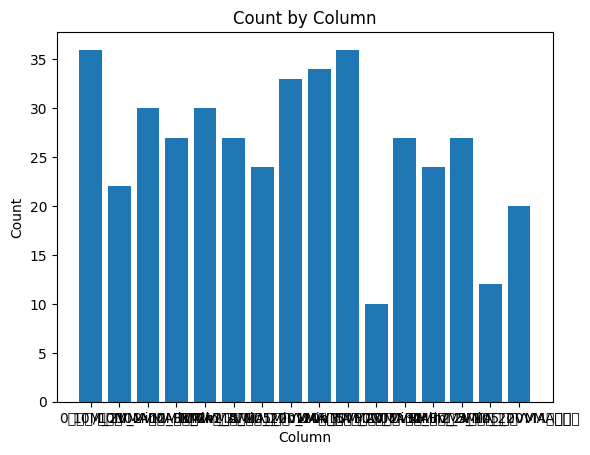

In [ ]:
# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.bar(quant_df['Column'], quant_df['Count'])
plt.xlabel('Column')
plt.ylabel('Count')
plt.title('Count by Column')

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.show()

In [ ]:
date = datetime.datetime.now().strftime("%Y%m%d")
today = datetime.date.today()
today

datetime.date(2023, 6, 21)

In [ ]:
date = datetime.datetime.now().strftime("%Y%m%d")
today = datetime.date.today()
directory = f"./{today.strftime('%Y%m%d')}"
# os.makedirs(directory, exist_ok=True)

#Í≤∞Í≥º Ï†ÄÏû•
quant_df.to_csv(f"{directory}_quant_df.csv", index=False)
result_df.to_csv(f"{directory}_result_df.csv", index=False)

NameError: ignored

### Îã§Î•∏ ÎÇ†Ïßú Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è Ï†ÄÏû•

In [ ]:
# quant_df = pd.read_csv("20230615_quant_df.csv")
# result_df = pd.read_csv("20230615_result_df.csv")
quant_df1 = pd.read_csv("20230621_quant_df.csv")
result_df1 = pd.read_csv("20230621_result_df.csv")
# result_df1 = pd.read_csv("15_21result_df.csv")

In [ ]:
\
# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú Ï§ëÎ≥µ Ìñâ Ï†úÍ±∞ ÌõÑ Ìï©ÏπòÍ∏∞
combined_df = pd.concat([result_df1, result_df]).drop_duplicates().reset_index(drop=True)
combined_df
combined_df.to_csv(f"15_21result_df.csv", index=False)

In [ ]:
result_df

Timestamp     Name  1Min5_20VMAÏ†ïÎ∞∞Ïó¥  3Min5_20VMAÏ†ïÎ∞∞Ïó¥  10M_2VMAÏö∞ÏÉÅÌñ•  \
0   2023-06-15 10:41:00       ÏÉòÌëú               1               0            1   
1   2023-06-15 13:20:00       DB               0               1            1   
2   2023-06-15 14:07:00    ÎåÄÌïúÍ¥ëÌÜµÏã†               1               0            0   
3   2023-06-15 14:13:00     Í∏∞Í∞ÄÎπÑÏä§               1               0            0   
4   2023-06-15 14:46:00     Î≥¥ÎùºÌã∞Ïïå               1               1            1   
5   2023-06-16 10:00:00       ÌÉúÏÑ±               1               1            1   
6   2023-06-16 10:02:00   Ïù¥ÏàòÌéòÌÉÄÏãúÏä§               1               0            1   
7   2023-06-16 10:50:00     Î†àÏù¥Ï†ÄÏéå               1               1            1   
8   2023-06-16 11:01:00     ÌîºÏΩîÍ∑∏Îû®               1               1            1   
9   2023-06-16 11:51:00     Î†àÏù¥Ï†ÄÏéå               1               1            1   
10  2023-06-16 13:56:00     Î∞±Í¥ëÏÇ∞ÏóÖ               1               1            1   
11  2023-06-19 09:44:00     ÌôîÏ≤úÍ∏∞Í≥Ñ               1               1            1   
12  2023-06-19 09:48:00     Î†àÏù¥Ï†ÄÏéå               1               0            1   
13  2023-06-19 11:47:00     ÌôîÏ≤úÍ∏∞Í≥Ñ               1               1            1   
14  2023-06-15 09:32:00  ÌÅ¨Î¶¨Ïä§ÌÉàÏã†ÏÜåÏû¨               1               1            1   
15  2023-06-15 09:59:00    ÌïúÎØ∏Î∞òÎèÑÏ≤¥               1               0            0   
16  2023-06-15 10:05:00     ÌÅêÎùºÌã∞Ïä§               0               0            1   
17  2023-06-15 10:20:00     Î≥¥ÎùºÌã∞Ïïå               1               0            1   
18  2023-06-15 10:20:00    Ïã†ÏÜ°ÌôÄÎî©Ïä§               1               0            1   
19  2023-06-15 10:26:00     Í≥†Î†§ÏÇ∞ÏóÖ               1               1            1   
20  2023-06-15 10:36:00    Ïã†ÏÜ°ÌôÄÎî©Ïä§               0               0            1   
21  2023-06-15 10:41:00       ÏÉòÌëú               1               0            1   
22  2023-06-15 10:47:00       ÌÉúÏÑ±               1               0            1   
23  2023-06-15 11:05:00  ÌïúÏª¥ÎùºÏù¥ÌîÑÏºÄÏñ¥               1               1            1   
24  2023-06-15 11:07:00    ÎåÄÎ¥âÏóòÏóêÏä§               1               1            1   
25  2023-06-15 11:56:00     ÌîºÏΩîÍ∑∏Îû®               1               0            0   
26  2023-06-15 13:20:00       DB               1               1            1   
27  2023-06-15 14:07:00    ÎåÄÌïúÍ¥ëÌÜµÏã†               1               0            0   
28  2023-06-15 14:13:00     Í∏∞Í∞ÄÎπÑÏä§               1               0            0   
29  2023-06-15 14:46:00     Î≥¥ÎùºÌã∞Ïïå               1               1            1   
30  2023-06-16 10:00:00       ÌÉúÏÑ±               1               1            1   
31  2023-06-16 10:02:00   Ïù¥ÏàòÌéòÌÉÄÏãúÏä§               1               0            1   
32  2023-06-16 10:50:00     Î†àÏù¥Ï†ÄÏéå               1               1            1   
33  2023-06-16 11:01:00     ÌîºÏΩîÍ∑∏Îû®               1               1            1   
34  2023-06-16 11:51:00     Î†àÏù¥Ï†ÄÏéå               1               1            1   
35  2023-06-16 13:56:00     Î∞±Í¥ëÏÇ∞ÏóÖ               1               1            1   

    30M_2VMAÏö∞ÏÉÅÌñ•  10Min2_3VMAÏ†ïÎ∞∞Ïó¥  30Min2_3VMAÏ†ïÎ∞∞Ïó¥  10M_2VMAÎ≥ÄÍ≥°  30M_2VMAÎ≥ÄÍ≥°  ...  \
0             1               1               1         0.0         0.0  ...   
1             0               1               0         1.0         NaN  ...   
2             0               0               0         0.0         0.0  ...   
3             1               0               1         0.0         0.0  ...   
4             1               1               1         1.0         1.0  ...   
5             1               1               1         1.0         0.0  ...   
6             0               0               0         1.0         0.0  ...   
7             1               1               1 